In [1]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

In [2]:
import random
import time
import numpy as np
rng = np.random.default_rng()
import math
import sys
from numpy import linalg as LA
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv('/kaggle/input/uci-har-best/uci_har_best_feat_X_train767.csv')
test_df = pd.read_csv('/kaggle/input/uci-har-best/uci_har_best_feat_X_test767.csv')
Y_train = pd.read_csv('/kaggle/input/uci-har-best/uci_har_best_feat_Y_train767.csv')
Y_test = pd.read_csv('/kaggle/input/uci-har-best/uci_har_best_feat_Y_test767.csv')

In [4]:
train_df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,757,758,759,760,761,762,763,764,765,766
0,0,2159.4392,6715.6904,3894.8923,648.51294,1207.85990,1636.64380,1053.14820,6549.8740,4556.2200,...,458.084000,443.16113,279.854370,709.01800,83.901825,234.622830,353.24857,365.500200,236.596940,339.24155
1,1,1176.6947,3761.5742,1936.5485,157.07024,587.28880,909.56560,645.02250,3788.6418,2540.4512,...,172.979400,208.12679,338.349200,427.30840,0.000000,192.524430,286.31024,383.847100,184.068180,161.80974
2,2,1701.7424,5732.0610,2843.8118,327.28983,961.16693,1250.15860,986.08210,5598.6685,3692.8835,...,804.757260,1414.45510,677.519900,925.99866,690.339840,0.000000,0.00000,217.781300,337.919070,348.30206
3,3,1505.5026,5204.3520,2556.0354,352.12750,857.76270,1124.77610,943.05180,4873.3940,3273.5180,...,169.974000,351.91177,200.620960,141.18820,147.716480,39.612076,275.36484,51.113052,32.385693,207.92162
4,4,1048.9443,3601.7375,1685.0039,266.37418,517.17580,580.94354,528.84515,3436.0662,2287.8599,...,1322.272100,260.49362,470.386870,450.62283,0.000000,739.170900,109.22951,732.401300,816.652500,395.23355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,7347,10719.4500,34841.3500,18473.5180,5334.13500,4008.51050,10636.54400,11076.77600,39909.2070,27836.4240,...,1275.399000,215.76968,1905.865500,0.00000,2406.963000,2402.921100,1075.84970,0.000000,1039.659800,1964.99400
7348,7348,1335.9203,4939.1140,2342.2798,368.28113,937.95840,1025.28380,899.21857,5003.8706,3316.8027,...,539.827150,163.43877,417.691930,408.40530,799.852540,1355.031400,664.50116,459.727200,0.000000,554.38520
7349,7349,11284.1090,38175.4060,19550.1200,5827.81150,5629.63770,12899.64550,12132.11500,46641.2400,31208.2930,...,561.593570,4102.92330,3957.683000,1703.33740,936.275940,9.719712,4296.13670,818.399400,0.000000,3285.63530
7350,7350,11219.1120,37576.6500,19455.9040,5675.65430,5463.35550,12840.08700,12143.60000,45992.9570,30799.1640,...,2929.051500,4093.37550,3098.922400,5111.83740,0.000000,5884.386700,7242.09770,3960.943600,8124.356000,2409.36670


In [5]:
train_df = train_df.drop('Unnamed: 0', axis=1)

In [6]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,757,758,759,760,761,762,763,764,765,766
0,2159.4392,6715.6904,3894.8923,648.51294,1207.85990,1636.64380,1053.14820,6549.8740,4556.2200,308.17136,...,458.08400,443.16113,279.85437,709.01800,83.901825,234.622830,353.24857,365.500200,236.596940,339.24155
1,1176.6947,3761.5742,1936.5485,157.07024,587.28880,909.56560,645.02250,3788.6418,2540.4512,289.73087,...,172.97940,208.12679,338.34920,427.30840,0.000000,192.524430,286.31024,383.847100,184.068180,161.80974
2,1701.7424,5732.0610,2843.8118,327.28983,961.16693,1250.15860,986.08210,5598.6685,3692.8835,428.88892,...,804.75726,1414.45510,677.51990,925.99866,690.339840,0.000000,0.00000,217.781300,337.919070,348.30206
3,1505.5026,5204.3520,2556.0354,352.12750,857.76270,1124.77610,943.05180,4873.3940,3273.5180,425.75552,...,169.97400,351.91177,200.62096,141.18820,147.716480,39.612076,275.36484,51.113052,32.385693,207.92162
4,1048.9443,3601.7375,1685.0039,266.37418,517.17580,580.94354,528.84515,3436.0662,2287.8599,199.50409,...,1322.27210,260.49362,470.38687,450.62283,0.000000,739.170900,109.22951,732.401300,816.652500,395.23355


In [7]:
Y_train = Y_train.drop('Unnamed: 0', axis=1)

In [8]:
Y_train.head()

,0
0,1
1,1
2,1
3,1
4,1


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8488846572361263
Feature: 0, Score: -0.00001
Feature: 1, Score: -0.00005
Feature: 2, Score: -0.00003
Feature: 3, Score: 0.00001
Feature: 4, Score: -0.00001
Feature: 5, Score: -0.00003
Feature: 6, Score: -0.00004
Feature: 7, Score: -0.00007
Feature: 8, Score: -0.00004
Feature: 9, Score: 0.00001
Feature: 10, Score: -0.00003
Feature: 11, Score: -0.00004
Feature: 12, Score: -0.00000
Feature: 13, Score: -0.00004
Feature: 14, Score: -0.00004
Feature: 15, Score: -0.00001
Feature: 16, Score: -0.00001
Feature: 17, Score: 0.00001
Feature: 18, Score: -0.00003
Feature: 19, Score: -0.00004
Feature: 20, Score: 0.00000
Feature: 21, Score: -0.00006
Feature: 22, Score: 0.00001
Feature: 23, Score: -0.00004
Feature: 24, Score: -0.00007
Feature: 25, Score: -0.00002
Feature: 26, Score: -0.00001
Feature: 27, Score: -0.00000
Feature: 28, Score: -0.00002
Feature: 29, Score: 0.00001
Feature: 30, Score: -0.00002
Feature: 31, Score: -0.00004
Feature: 32, Score: -0.00004
Feature: 33, Score: -0.00005
Feature: 34

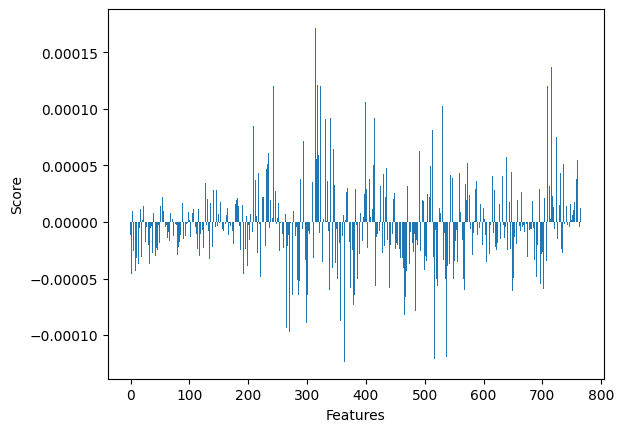

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# fit the model
model.fit(train_df, Y_train)
model.predict(train_df)
acc=model.score(train_df, Y_train)
print(acc)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)

pyplot.xlabel('Features') 
pyplot.ylabel('Score') 
pyplot.show()




/tmp/ipykernel_30/2435369832.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_df, Y_train)


1.0
Feature: 0, Score: 0.00056
Feature: 1, Score: 0.00047
Feature: 2, Score: 0.00060
Feature: 3, Score: 0.00072
Feature: 4, Score: 0.00087
Feature: 5, Score: 0.00048
Feature: 6, Score: 0.00046
Feature: 7, Score: 0.00055
Feature: 8, Score: 0.00044
Feature: 9, Score: 0.00097
Feature: 10, Score: 0.00049
Feature: 11, Score: 0.00081
Feature: 12, Score: 0.00017
Feature: 13, Score: 0.00048
Feature: 14, Score: 0.00092
Feature: 15, Score: 0.00071
Feature: 16, Score: 0.00166
Feature: 17, Score: 0.00082
Feature: 18, Score: 0.00155
Feature: 19, Score: 0.00084
Feature: 20, Score: 0.00102
Feature: 21, Score: 0.00140
Feature: 22, Score: 0.00065
Feature: 23, Score: 0.00081
Feature: 24, Score: 0.00051
Feature: 25, Score: 0.00046
Feature: 26, Score: 0.00042
Feature: 27, Score: 0.00040
Feature: 28, Score: 0.00153
Feature: 29, Score: 0.00061
Feature: 30, Score: 0.00046
Feature: 31, Score: 0.00066
Feature: 32, Score: 0.00128
Feature: 33, Score: 0.00042
Feature: 34, Score: 0.00087
Feature: 35, Score: 0.0006

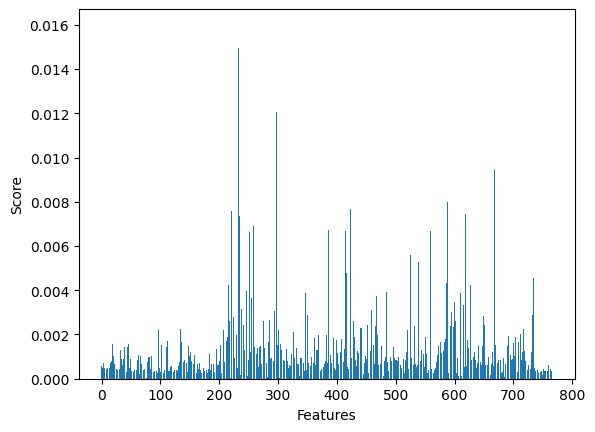

In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# fit the model
model.fit(train_df, Y_train)
model.predict(train_df)
acc=model.score(train_df, Y_train)
print(acc)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xlabel('Features') 
pyplot.ylabel('Score') 
pyplot.show()

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [19]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,757,758,759,760,761,762,763,764,765,766
0,2159.4392,6715.6904,3894.8923,648.51294,1207.85990,1636.64380,1053.14820,6549.8740,4556.2200,308.17136,...,458.08400,443.16113,279.85437,709.01800,83.901825,234.622830,353.24857,365.500200,236.596940,339.24155
1,1176.6947,3761.5742,1936.5485,157.07024,587.28880,909.56560,645.02250,3788.6418,2540.4512,289.73087,...,172.97940,208.12679,338.34920,427.30840,0.000000,192.524430,286.31024,383.847100,184.068180,161.80974
2,1701.7424,5732.0610,2843.8118,327.28983,961.16693,1250.15860,986.08210,5598.6685,3692.8835,428.88892,...,804.75726,1414.45510,677.51990,925.99866,690.339840,0.000000,0.00000,217.781300,337.919070,348.30206
3,1505.5026,5204.3520,2556.0354,352.12750,857.76270,1124.77610,943.05180,4873.3940,3273.5180,425.75552,...,169.97400,351.91177,200.62096,141.18820,147.716480,39.612076,275.36484,51.113052,32.385693,207.92162
4,1048.9443,3601.7375,1685.0039,266.37418,517.17580,580.94354,528.84515,3436.0662,2287.8599,199.50409,...,1322.27210,260.49362,470.38687,450.62283,0.000000,739.170900,109.22951,732.401300,816.652500,395.23355


In [49]:
X_train, X_test, y_train, y_test = train_test_split(train_df, Y_train, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=300, random_state=42)
# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [50]:
accuracy

0.9066183136899365

In [51]:
print(classification_rep)

              precision    recall  f1-score   support

           1       0.86      0.89      0.88       394
           2       0.89      0.84      0.87       334
           3       0.84      0.89      0.87       284
           4       0.93      0.90      0.91       385
           5       0.92      0.94      0.93       391
           6       0.98      0.96      0.97       418

    accuracy                           0.91      2206
   macro avg       0.90      0.90      0.90      2206
weighted avg       0.91      0.91      0.91      2206

